# Explorative Data Analysis

In [1]:
%load_ext autoreload
%autoreload 2
from data_loader import load_participants_info, load_event_descriptions, load_behavioral_data
import pandas as pd

In [7]:
DATASET_PATH = "data"
participants_df = load_participants_info(DATASET_PATH)
load_event_descriptions(DATASET_PATH)

df_behavior = load_behavioral_data(DATASET_PATH, "01")
for idx in range(2,11):
    sample_participant = f"0{idx}"
    df = load_behavioral_data(DATASET_PATH, sample_participant)
    df_behavior = pd.concat([df, df_behavior], ignore_index=True)

In [9]:
df_behavior.head()

,onset,duration,TrialEvent,BlockNumber,TrialNumber,Condition,SceneCategory,ObjectCategory,SceneRem,ObjectRem,MemCategory,Target,Distracter,PreEvent_PupilMax,Event_PupilDilation,MemoryStrength,subject,task,type
0,2.117,1.0,MoneyCue,4.0,1.0,NEUTRAL,REMSCENE,REMOBJECT,1.0,1.0,RR,indoor68.jpg,inanimate20.jpg,42.800,1.4728,2.0,09,task-Overlap,NaN
1,3.117,2.0,Anticipation,4.0,1.0,NEUTRAL,REMSCENE,REMOBJECT,1.0,1.0,RR,indoor68.jpg,inanimate20.jpg,NaN,NaN,2.0,09,task-Overlap,NaN
2,5.133,2.5,Image,4.0,1.0,NEUTRAL,REMSCENE,REMOBJECT,1.0,1.0,RR,indoor68.jpg,inanimate20.jpg,46.912,7.1864,2.0,09,task-Overlap,NaN
3,14.865,1.0,MoneyCue,4.0,2.0,AROUSING,REMSCENE,FORGOTOBJECT,1.0,0.0,RF,indoor58.jpg,inanimate10.jpg,51.300,-1.7098,3.0,09,task-Overlap,NaN
4,15.865,6.0,Anticipation,4.0,2.0,AROUSING,REMSCENE,FORGOTOBJECT,1.0,0.0,RF,indoor58.jpg,inanimate10.jpg,NaN,NaN,3.0,09,task-Overlap,NaN


In [14]:
df_behavior['MemoryStrength'].value_counts()

MemoryStrength
3.0    1170
2.0     798
1.0     624
Name: count, dtype: int64

In [10]:
df_behavior_clean = df_behavior[['Condition', 'onset', 'duration', 'PreEvent_PupilMax', 'Event_PupilDilation']].dropna()
df_behavior_clean['Condition'] = df_behavior_clean['Condition'].astype('category')
df_behavior_clean

,Condition,onset,duration,PreEvent_PupilMax,Event_PupilDilation
0,NEUTRAL,2.117,1.0,42.800,1.47280
2,NEUTRAL,5.133,2.5,46.912,7.18640
3,AROUSING,14.865,1.0,51.300,-1.70980
5,AROUSING,21.865,2.5,43.533,6.13880
6,NEUTRAL,31.580,1.0,50.733,-1.96280
...,...,...,...,...,...
3881,NEUTRAL,320.734,2.5,40.255,0.64647
3882,NEUTRAL,329.566,1.0,36.967,0.34481
3884,NEUTRAL,332.566,2.5,39.533,1.22080
3885,AROUSING,342.381,1.0,42.949,-0.82240


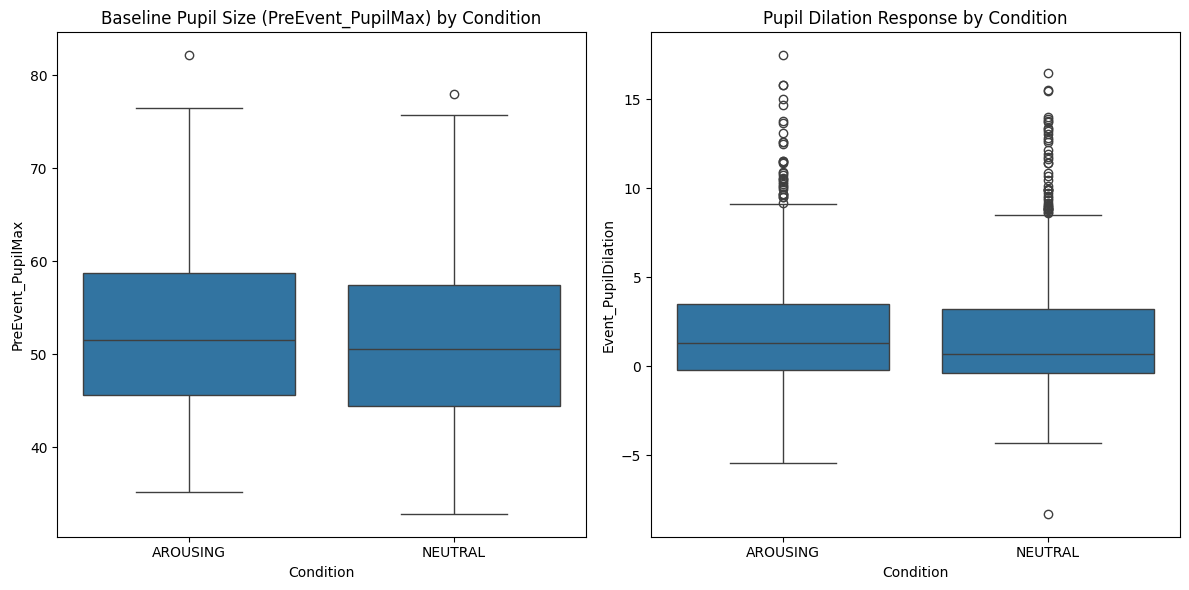

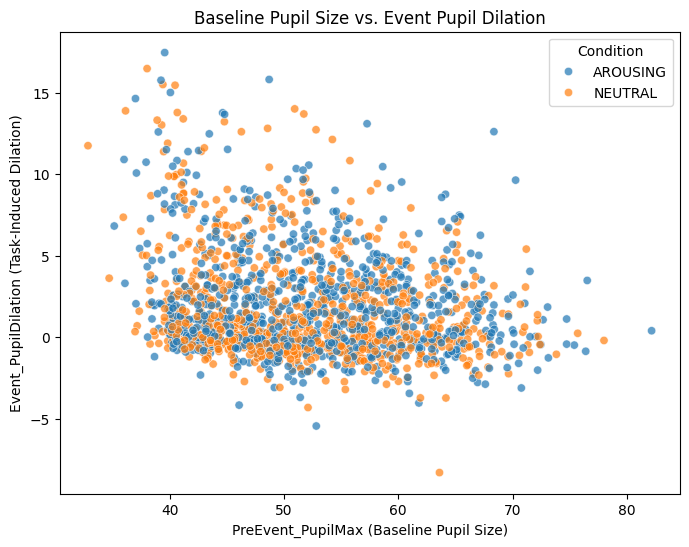

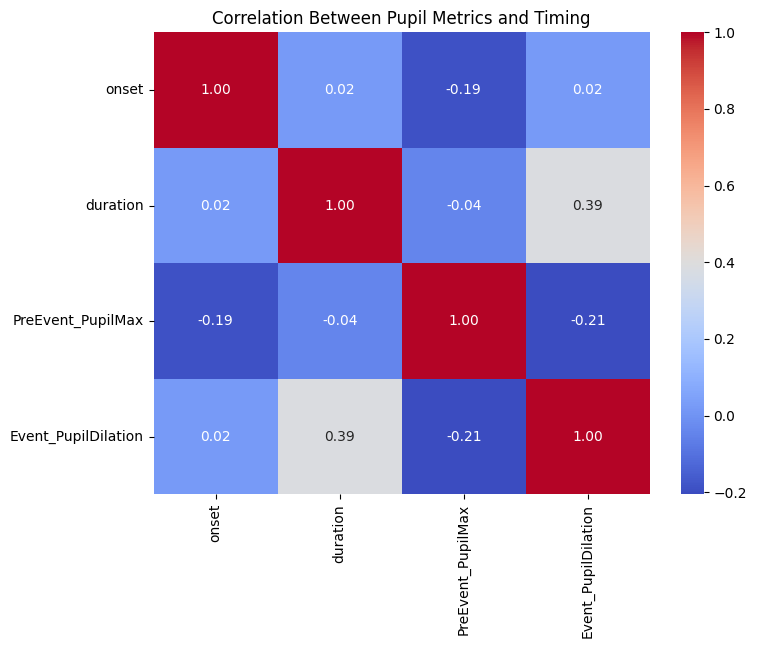

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Distribution of PreEvent_PupilMax by Condition
plt.subplot(1, 2, 1)
sns.boxplot(x='Condition', y='PreEvent_PupilMax', data=df_behavior_clean)
plt.title("Baseline Pupil Size (PreEvent_PupilMax) by Condition")
plt.xlabel("Condition")
plt.ylabel("PreEvent_PupilMax")

# Distribution of Event_PupilDilation by Condition
plt.subplot(1, 2, 2)
sns.boxplot(x='Condition', y='Event_PupilDilation', data=df_behavior_clean)
plt.title("Pupil Dilation Response by Condition")
plt.xlabel("Condition")
plt.ylabel("Event_PupilDilation")

plt.tight_layout()
plt.show()

# Scatter plot of PreEvent_PupilMax vs Event_PupilDilation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PreEvent_PupilMax', y='Event_PupilDilation', hue='Condition', data=df_behavior_clean, alpha=0.7)
plt.title("Baseline Pupil Size vs. Event Pupil Dilation")
plt.xlabel("PreEvent_PupilMax (Baseline Pupil Size)")
plt.ylabel("Event_PupilDilation (Task-Induced Dilation)")
plt.legend(title="Condition")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_behavior_clean[['onset', 'duration', 'PreEvent_PupilMax', 'Event_PupilDilation']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Pupil Metrics and Timing")
plt.show()


/var/folders/yt/5gdjwln55x9_stgx851x0yb80000gn/T/ipykernel_39484/273931390.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='TrialNumber', y='Event_PupilDilation', hue='Condition', data=df_behavior, ci="sd")


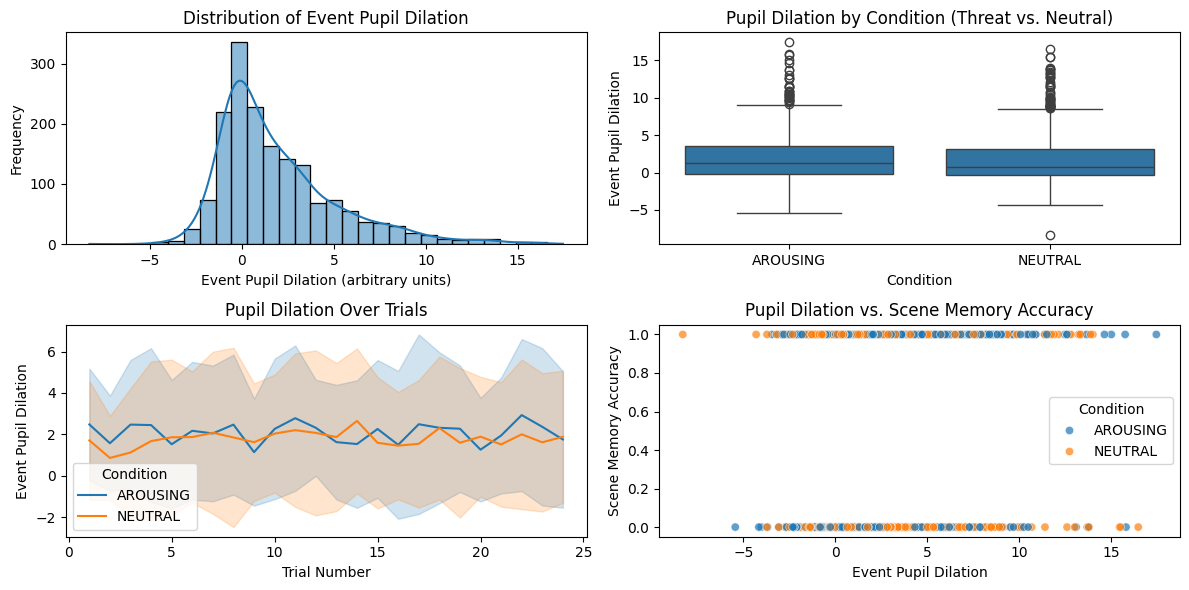

In [12]:
df_behavior['Condition'] = df_behavior['Condition'].astype('category')
plt.figure(figsize=(12, 6))

# 1. Distribution of Pupil Dilation (Event_PupilDilation) across Participants
plt.subplot(2, 2, 1)
sns.histplot(df_behavior['Event_PupilDilation'].dropna(), bins=30, kde=True)
plt.title("Distribution of Event Pupil Dilation")
plt.xlabel("Event Pupil Dilation (arbitrary units)")
plt.ylabel("Frequency")

# 2. Boxplot of Event Pupil Dilation by Condition
plt.subplot(2, 2, 2)
sns.boxplot(x='Condition', y='Event_PupilDilation', data=df_behavior)
plt.title("Pupil Dilation by Condition (Threat vs. Neutral)")
plt.xlabel("Condition")
plt.ylabel("Event Pupil Dilation")

# 3. Line plot: Pupil Dilation over Trial Number (to see trends)
plt.subplot(2, 2, 3)
sns.lineplot(x='TrialNumber', y='Event_PupilDilation', hue='Condition', data=df_behavior, ci="sd")
plt.title("Pupil Dilation Over Trials")
plt.xlabel("Trial Number")
plt.ylabel("Event Pupil Dilation")

# 4. Scatter plot: Memory Accuracy (SceneRem) vs. Pupil Dilation
plt.subplot(2, 2, 4)
sns.scatterplot(x='Event_PupilDilation', y='SceneRem', hue='Condition', data=df_behavior, alpha=0.7)
plt.title("Pupil Dilation vs. Scene Memory Accuracy")
plt.xlabel("Event Pupil Dilation")
plt.ylabel("Scene Memory Accuracy")

plt.tight_layout()
plt.show()